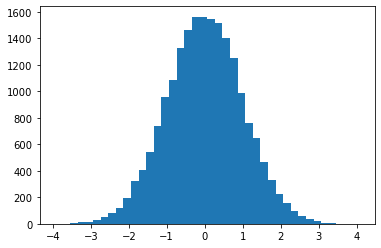

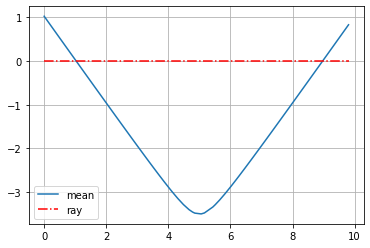

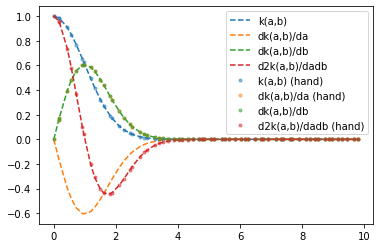

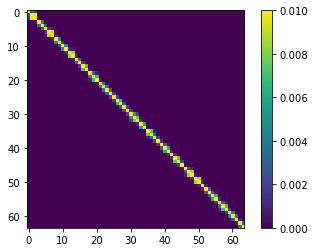

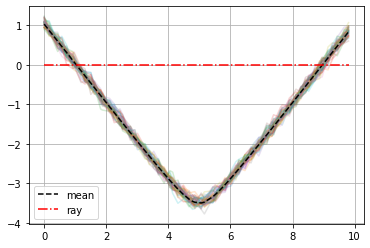

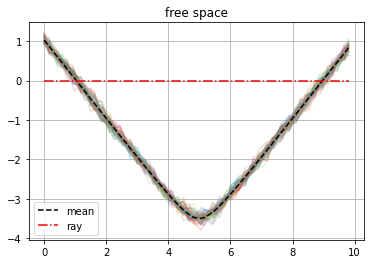

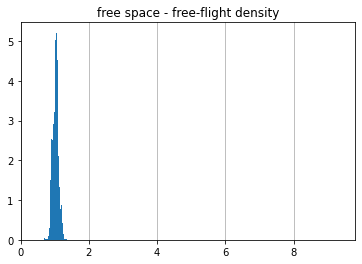

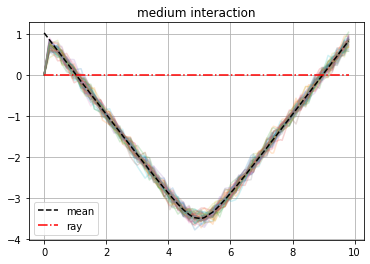

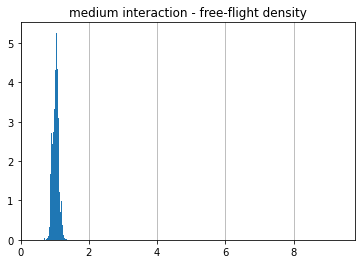

In [27]:
import numpy as np
import matplotlib.pyplot as plt

t = np.fromfile('ts.bin', dtype=np.float32)

nps = len(t)

norm_samples = np.fromfile('normalSamples.bin', dtype=np.float32)
plt.hist(norm_samples, bins=40)
plt.show()

mean = np.reshape(np.fromfile('mean.bin', dtype=np.float32), (-1,nps+1))[0]
plt.plot(t, mean[:nps], alpha=1, label="mean")
plt.plot(t, np.zeros_like(t), "-.", color="red", label="ray")
plt.grid()
plt.legend()
plt.show()


kernel = np.reshape(np.fromfile('kernel-eval.bin', dtype=np.float32), (nps,4)).T
plt.plot(t, kernel[0], "--", alpha=1, label="k(a,b)")
plt.plot(t, kernel[1], "--", alpha=1, label="dk(a,b)/da")
plt.plot(t, kernel[2], "--", alpha=1, label="dk(a,b)/db")
plt.plot(t, kernel[3], "--", alpha=1, label="d2k(a,b)/dadb")
plt.gca().set_prop_cycle(None)

kernel = np.reshape(np.fromfile('kernel-eval-old.bin', dtype=np.float32), (nps,4)).T
plt.plot(t, kernel[0], ".", alpha=0.5, label="k(a,b) (hand)")
plt.plot(t, kernel[1], ".", alpha=0.5, label="dk(a,b)/da (hand)")
plt.plot(t, kernel[2], ".", alpha=0.5, label="dk(a,b)/db")
plt.plot(t, kernel[3], ".", alpha=0.5, label="d2k(a,b)/dadb (hand)")
plt.legend()
plt.show()

cov = np.reshape(np.fromfile('cov.bin', dtype=np.float32), (-1,nps+1))
plt.imshow(cov[:nps,:nps])
plt.colorbar()
plt.show()

samples = np.reshape(np.fromfile('samples.bin', dtype=np.float32), (-1,nps+1))
for sample in samples:
    plt.plot(t, sample[:nps], alpha=0.2)

plt.plot(t, mean[:nps], "--", alpha=1, color="black", label="mean")
plt.plot(t, np.zeros_like(t), "-.", color="red", label="ray")
plt.legend()
plt.grid()
plt.show()


samples = np.reshape(np.fromfile('samples-free-space.bin', dtype=np.float32), (-1,nps+1))
plt.title("free space")
for sample in samples:
    plt.plot(t, sample[:nps], alpha=0.2)
plt.plot(t, mean[:nps], "--", alpha=1, color="black", label="mean")
plt.plot(t, np.zeros_like(t), "-.", color="red", label="ray")
plt.legend()
plt.grid()
plt.show()

dist_samples = np.fromfile('dist-samples-free.bin', dtype=np.float32)
plt.title("free space - free-flight density")
plt.hist(dist_samples, bins=32, density=True)
plt.xlim(0, t.max())
plt.grid(True, axis="x")
plt.show()

samples = np.reshape(np.fromfile('samples-cond-const.bin', dtype=np.float32), (-1,nps+1))
plt.title("medium interaction")
for sample in samples:
    plt.plot(t, sample[:nps], alpha=0.2)
plt.plot(t, mean[:nps], "--", alpha=1, color="black", label="mean")
plt.plot(t, np.zeros_like(t), "-.", color="red", label="ray")
plt.legend()
plt.grid()
plt.show()


dist_samples = np.fromfile('dist-samples-cond.bin', dtype=np.float32)
plt.title("medium interaction - free-flight density")
plt.hist(dist_samples, bins=32, density=True)
plt.xlim(0, t.max())
plt.grid(True, axis="x")
plt.show()